In [118]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from scipy.stats.mstats import winsorize
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer

In [119]:
# Muat dataset
df = pd.read_csv('Covid Data.csv')

In [120]:
# Tampilkan 5 baris pertama
print("5 Baris Pertama Dataset:")
print(df.head())

5 Baris Pertama Dataset:
   USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  PNEUMONIA  \
0      2             1    1             1  03/05/2020       97          1   
1      2             1    2             1  03/06/2020       97          1   
2      2             1    2             2  09/06/2020        1          2   
3      2             1    1             1  12/06/2020       97          2   
4      2             1    2             1  21/06/2020       97          2   

   AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  HIPERTENSION  OTHER_DISEASE  \
0   65         2         2  ...       2        2             1              2   
1   72        97         2  ...       2        2             1              2   
2   55        97         1  ...       2        2             2              2   
3   53         2         2  ...       2        2             2              2   
4   68        97         1  ...       2        2             1              2   

   CARDIOVASCULAR  OBESIT

In [121]:
# Cek dimensi data
print("\nDimensi Dataset:")
print(f"Jumlah baris: {df.shape[0]}, Jumlah kolom: {df.shape[1]}")


Dimensi Dataset:
Jumlah baris: 1048575, Jumlah kolom: 21


In [122]:
# Cek tipe data
print("\nTipe Data Setiap Kolom:")
print(df.dtypes)


Tipe Data Setiap Kolom:
USMER                    int64
MEDICAL_UNIT             int64
SEX                      int64
PATIENT_TYPE             int64
DATE_DIED               object
INTUBED                  int64
PNEUMONIA                int64
AGE                      int64
PREGNANT                 int64
DIABETES                 int64
COPD                     int64
ASTHMA                   int64
INMSUPR                  int64
HIPERTENSION             int64
OTHER_DISEASE            int64
CARDIOVASCULAR           int64
OBESITY                  int64
RENAL_CHRONIC            int64
TOBACCO                  int64
CLASIFFICATION_FINAL     int64
ICU                      int64
dtype: object


In [123]:
# Cek missing values (nilai 97 dan 99)
print("\nMissing Values (97 dan 99):")
missing_values = df.isin([97, 99]).sum()
print(missing_values)


Missing Values (97 dan 99):
USMER                        0
MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
DATE_DIED                    0
INTUBED                 855869
PNEUMONIA                16003
AGE                        221
PREGNANT                523511
DIABETES                     0
COPD                         0
ASTHMA                       0
INMSUPR                      0
HIPERTENSION                 0
OTHER_DISEASE                0
CARDIOVASCULAR               0
OBESITY                      0
RENAL_CHRONIC                0
TOBACCO                      0
CLASIFFICATION_FINAL         0
ICU                     856032
dtype: int64


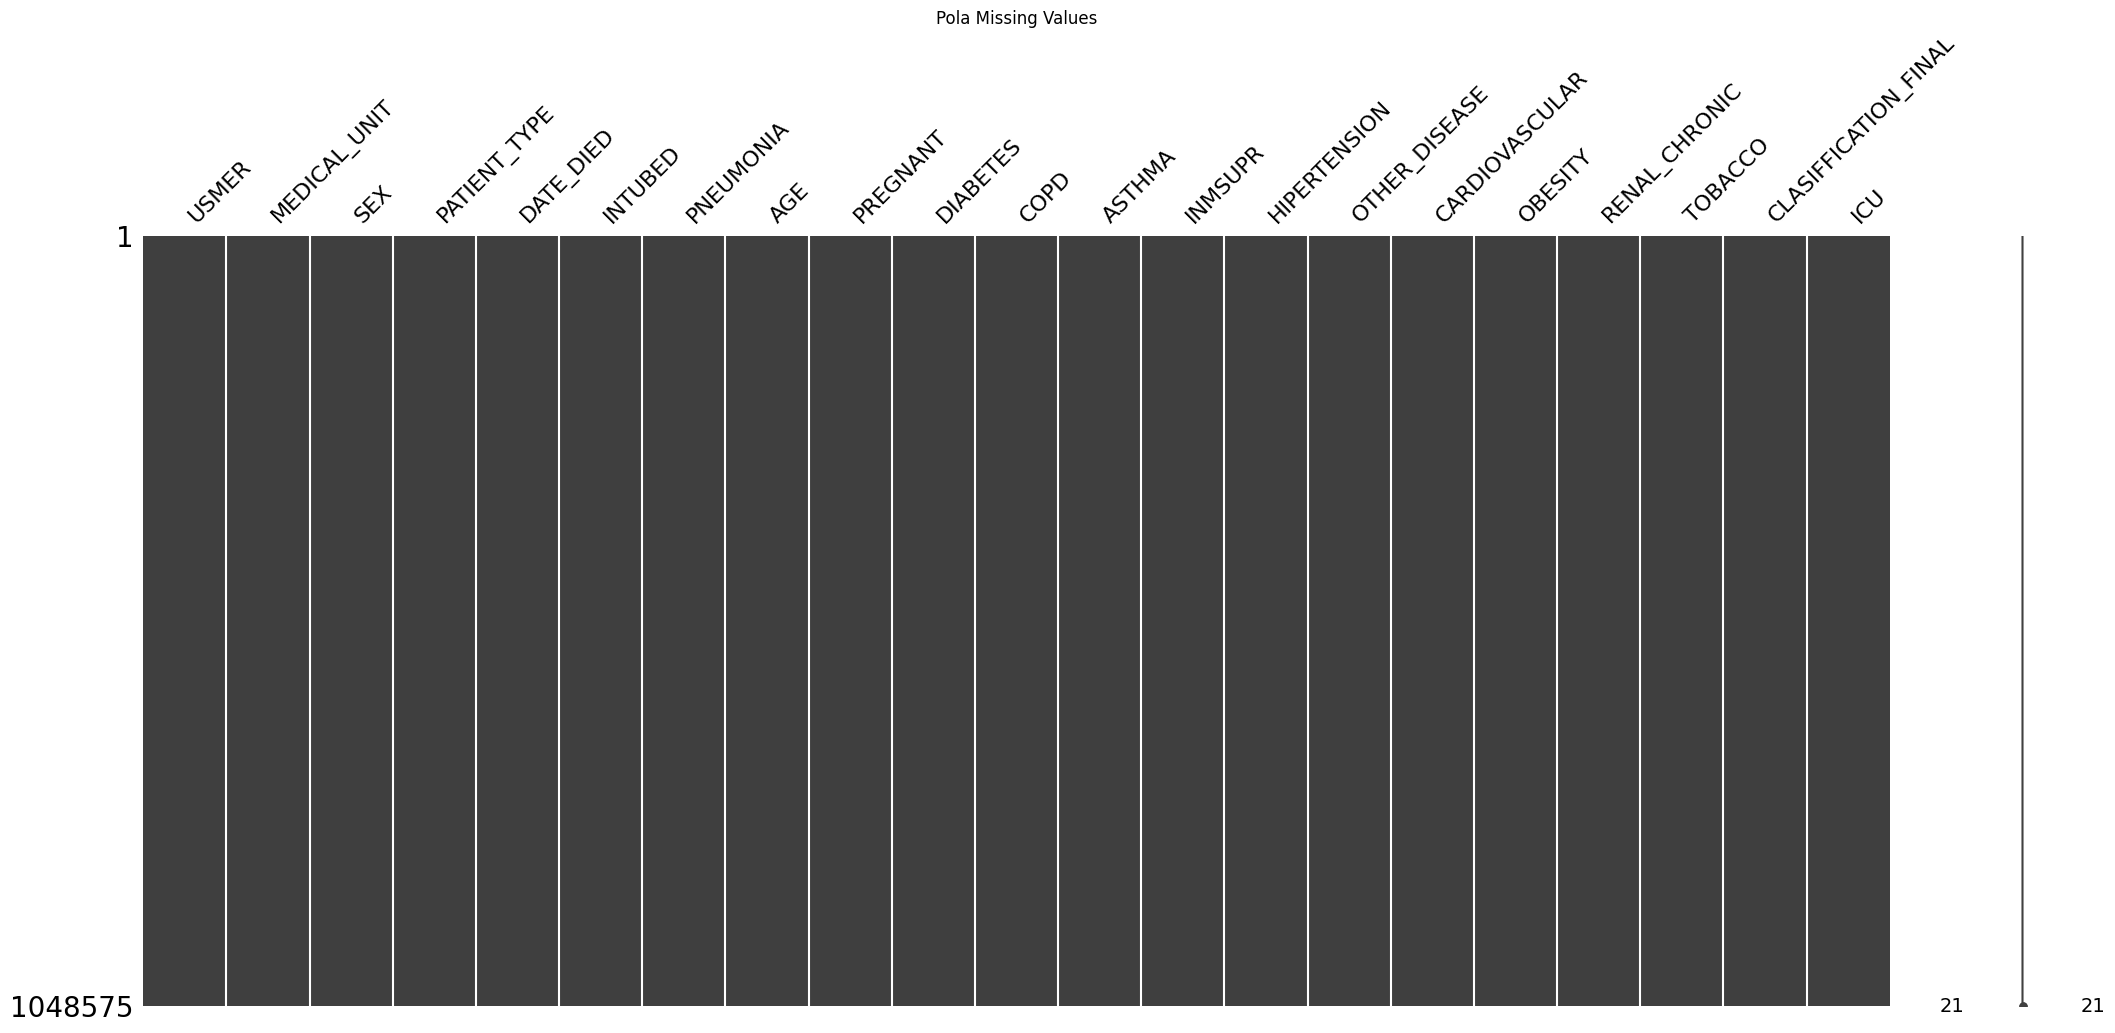

In [124]:
# Visualisasi pola missing values
msno.matrix(df)
plt.title('Pola Missing Values')
plt.show()

In [125]:
# Analisis statistik deskriptif
print("\nStatistik Deskriptif:")
print(df.describe())


Statistik Deskriptif:
              USMER  MEDICAL_UNIT           SEX  PATIENT_TYPE       INTUBED  \
count  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06   
mean   1.632194e+00  8.980565e+00  1.499259e+00  1.190765e+00  7.952288e+01   
std    4.822084e-01  3.723278e+00  4.999997e-01  3.929041e-01  3.686889e+01   
min    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%    1.000000e+00  4.000000e+00  1.000000e+00  1.000000e+00  9.700000e+01   
50%    2.000000e+00  1.200000e+01  1.000000e+00  1.000000e+00  9.700000e+01   
75%    2.000000e+00  1.200000e+01  2.000000e+00  1.000000e+00  9.700000e+01   
max    2.000000e+00  1.300000e+01  2.000000e+00  2.000000e+00  9.900000e+01   

          PNEUMONIA           AGE      PREGNANT      DIABETES          COPD  \
count  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06   
mean   3.346831e+00  4.179410e+01  4.976558e+01  2.186404e+00  2.260569e+00   
std    1.191288e+01  1.69073

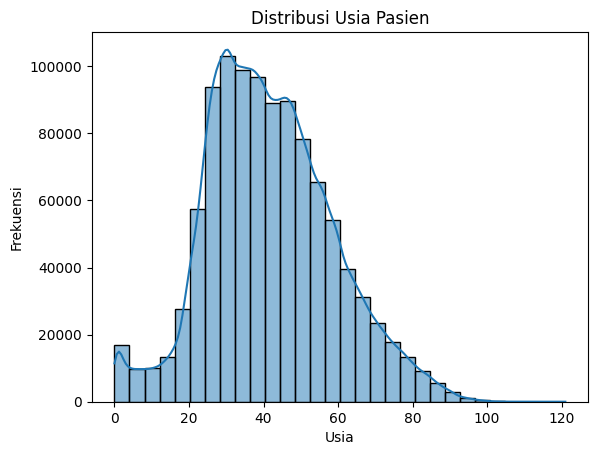

In [126]:
# Analisis distribusi usia (AGE)
sns.histplot(df['AGE'], bins=30, kde=True)
plt.title('Distribusi Usia Pasien')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()

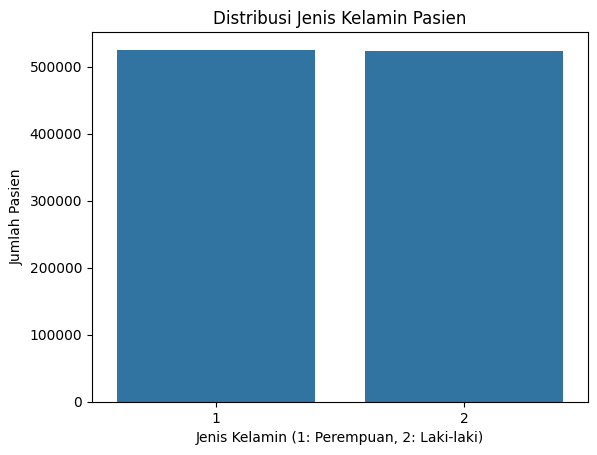

In [127]:
# Analisis distribusi jenis kelamin (SEX)
sns.countplot(x='SEX', data=df)
plt.title('Distribusi Jenis Kelamin Pasien')
plt.xlabel('Jenis Kelamin (1: Perempuan, 2: Laki-laki)')
plt.ylabel('Jumlah Pasien')
plt.show()

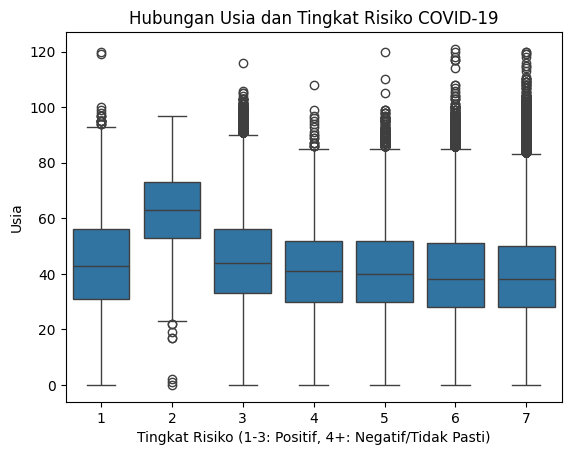

In [128]:
# Analisis hubungan usia dan risiko (AGE vs CLASIFFICATION_FINAL)
sns.boxplot(x='CLASIFFICATION_FINAL', y='AGE', data=df)
plt.title('Hubungan Usia dan Tingkat Risiko COVID-19')
plt.xlabel('Tingkat Risiko (1-3: Positif, 4+: Negatif/Tidak Pasti)')
plt.ylabel('Usia')
plt.show()

In [129]:
# Kategorisasi usia
bins = [0, 18, 40, 60, 80, 100]
labels = ['0-18', '19-40', '41-60', '61-80', '81+']
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=bins, labels=labels)

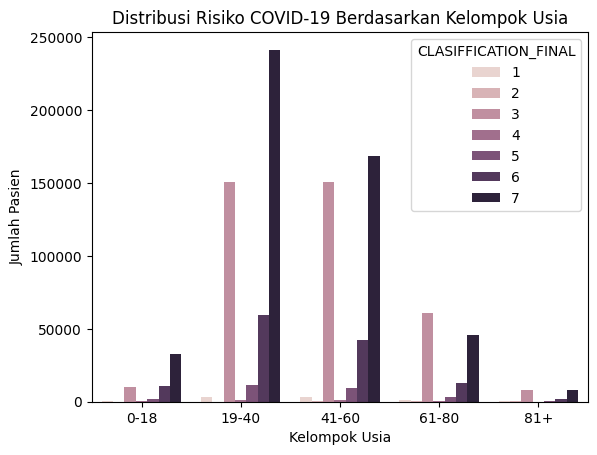

In [130]:
# Analisis distribusi risiko berdasarkan kelompok usia
sns.countplot(x='AGE_GROUP', hue='CLASIFFICATION_FINAL', data=df)
plt.title('Distribusi Risiko COVID-19 Berdasarkan Kelompok Usia')
plt.xlabel('Kelompok Usia')
plt.ylabel('Jumlah Pasien')
plt.show()

In [131]:
# Analisis jumlah kondisi medis
conditions = ['DIABETES', 'PNEUMONIA', 'HIPERTENSION', 'OBESITY', 'CARDIOVASCULAR', 'RENAL_CHRONIC']
df['NUM_CONDITIONS'] = df[conditions].apply(lambda x: x.eq(1).sum(), axis=1)

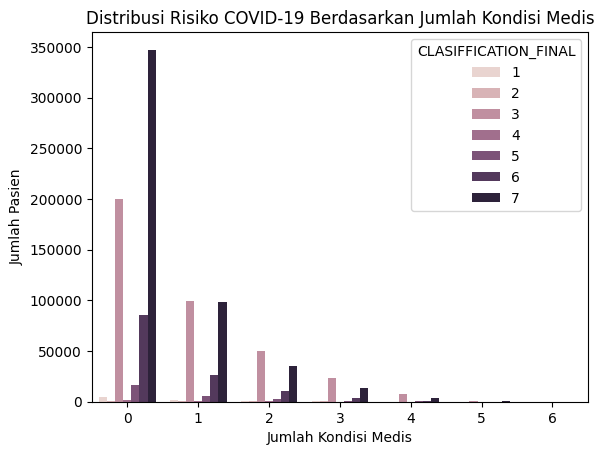

In [132]:
# Analisis risiko berdasarkan jumlah kondisi medis
sns.countplot(x='NUM_CONDITIONS', hue='CLASIFFICATION_FINAL', data=df)
plt.title('Distribusi Risiko COVID-19 Berdasarkan Jumlah Kondisi Medis')
plt.xlabel('Jumlah Kondisi Medis')
plt.ylabel('Jumlah Pasien')
plt.show()

In [133]:
# Analisis temporal (DATE_DIED)
df['DATE_DIED'] = pd.to_datetime(df['DATE_DIED'], format='%d/%m/%Y', errors='coerce')
df['DIED'] = df['DATE_DIED'].notna().astype(int)

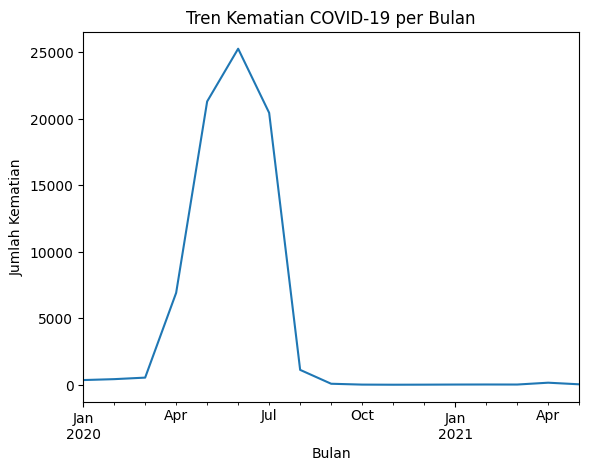

In [134]:
# Analisis tren kematian per bulan
df['MONTH_DIED'] = df['DATE_DIED'].dt.to_period('M')
death_trend = df[df['DIED'] == 1].groupby('MONTH_DIED').size()
death_trend.plot(kind='line')
plt.title('Tren Kematian COVID-19 per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Kematian')
plt.show()

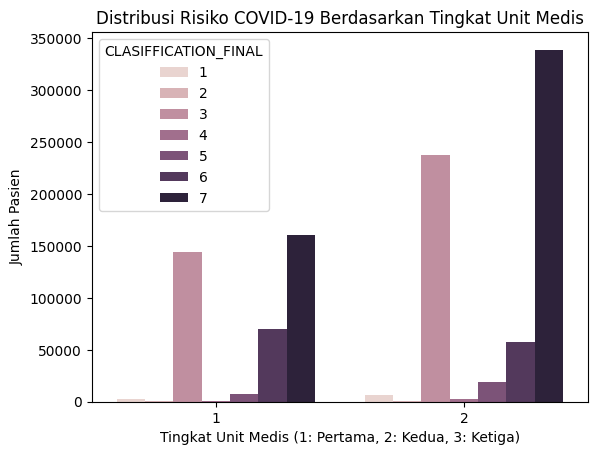

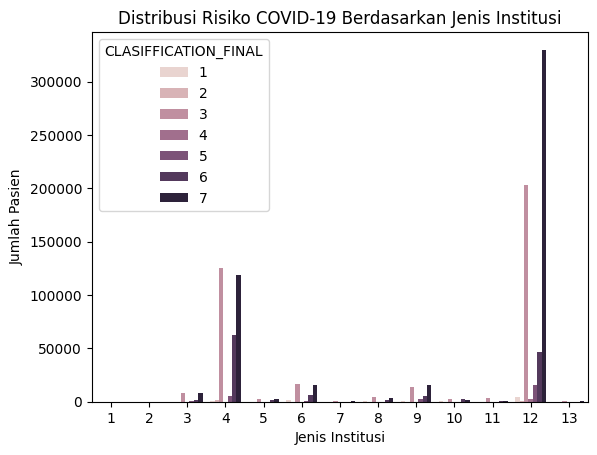

In [135]:
# Analisis geografis (USMER dan MEDICAL_UNIT)
sns.countplot(x='USMER', hue='CLASIFFICATION_FINAL', data=df)
plt.title('Distribusi Risiko COVID-19 Berdasarkan Tingkat Unit Medis')
plt.xlabel('Tingkat Unit Medis (1: Pertama, 2: Kedua, 3: Ketiga)')
plt.ylabel('Jumlah Pasien')
plt.show()

sns.countplot(x='MEDICAL_UNIT', hue='CLASIFFICATION_FINAL', data=df)
plt.title('Distribusi Risiko COVID-19 Berdasarkan Jenis Institusi')
plt.xlabel('Jenis Institusi')
plt.ylabel('Jumlah Pasien')
plt.show()

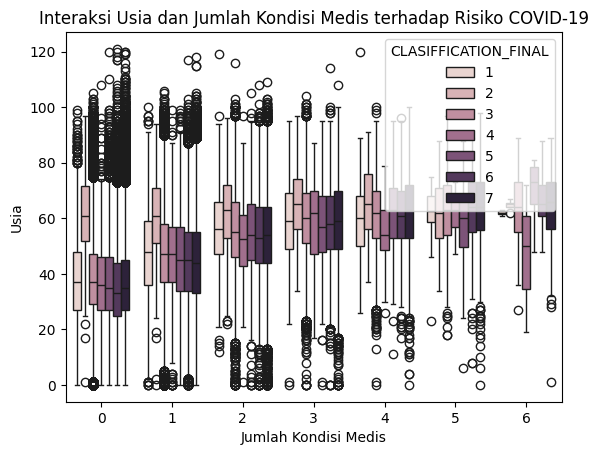

In [136]:
# Analisis interaksi usia dan jumlah kondisi medis
sns.boxplot(x='NUM_CONDITIONS', y='AGE', hue='CLASIFFICATION_FINAL', data=df)
plt.title('Interaksi Usia dan Jumlah Kondisi Medis terhadap Risiko COVID-19')
plt.xlabel('Jumlah Kondisi Medis')
plt.ylabel('Usia')
plt.show()

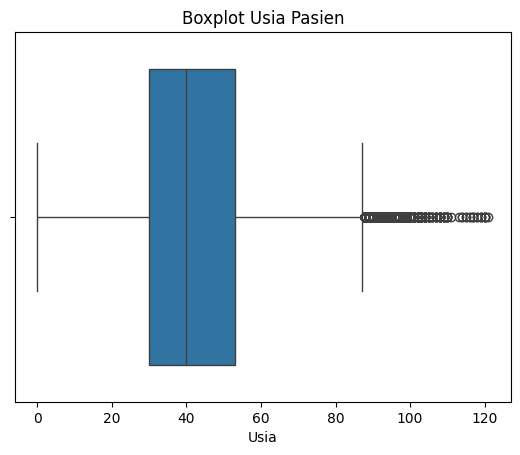

In [137]:
# Analisis outlier pada usia (AGE)
sns.boxplot(x=df['AGE'])
plt.title('Boxplot Usia Pasien')
plt.xlabel('Usia')
plt.show()

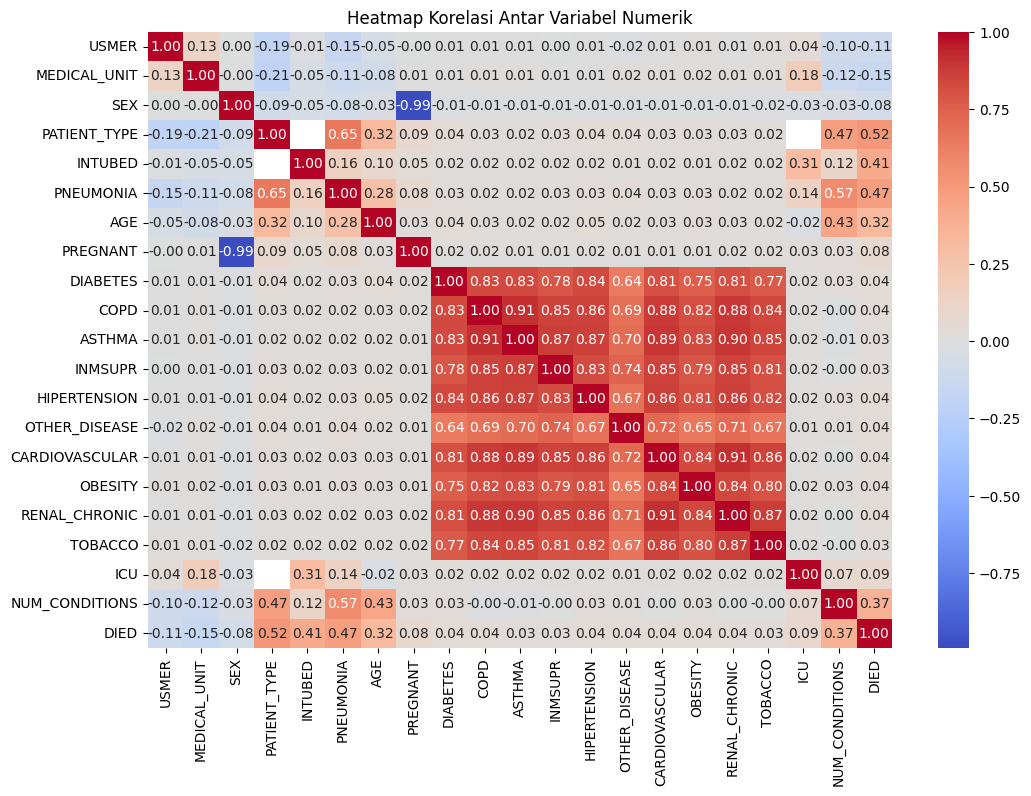

In [138]:
# Buat salinan dataframe untuk menghindari perubahan pada dataframe asli
df_numeric = df.copy()

# Hapus kolom non-numerik atau kolom yang tidak relevan untuk korelasi
kolom_non_numerik = ['DATE_DIED', 'CLASIFFICATION_FINAL', 'AGE_GROUP', 'MONTH_DIED']
df_numeric = df_numeric.drop(columns=kolom_non_numerik)

# Konversi kolom boolean (1 dan 2) ke 0 dan 1
kolom_boolean = ['SEX', 'DIABETES', 'PNEUMONIA', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION',
                 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO',
                 'INTUBED', 'ICU', 'DIED']
df_numeric[kolom_boolean] = df_numeric[kolom_boolean].replace({1: 1, 2: 0, 97: np.nan, 99: np.nan})

# Hitung korelasi hanya untuk kolom numerik
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Antar Variabel Numerik')
plt.show()

In [139]:
# Penanganan Missing Values
# Hapus kolom dengan missing values tinggi
df = df.drop(columns=['INTUBED', 'ICU'])

df.loc[(df['SEX'] == 2), 'PREGNANT'] = 0  # Laki-laki tidak hamil
df['PREGNANT'] = df['PREGNANT'].replace({97: 0, 98: 0, 99: 0})  # Handle missing values
df['PREGNANT'] = df['PREGNANT'].fillna(df['PREGNANT'].mode()[0])  # Imputasi modus untuk perempuanuk perempuan

# Imputasi missing values pada kolom PNEUMONIA
df['PNEUMONIA'] = df['PNEUMONIA'].fillna(df['PNEUMONIA'].mode()[0])

# Imputasi missing values pada kolom AGE
df['AGE'] = df['AGE'].fillna(df['AGE'].median())

In [140]:
binary_columns = ['SEX', 'PATIENT_TYPE', 'PREGNANT', 'DIABETES', 'PNEUMONIA', 'COPD', 'ASTHMA',
                  'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
                  'RENAL_CHRONIC', 'TOBACCO']
df[binary_columns] = df[binary_columns].replace({1: 1, 2: 0, 98: 0, 99: 0})

In [141]:
# Penanganan Data Temporal (DATE_DIED)
# Konversi ke format datetime
df['DATE_DIED'] = pd.to_datetime(df['DATE_DIED'], format='%d/%m/%Y', errors='coerce')

# Buat kolom DIED (1 jika pasien meninggal, 0 jika tidak)
df['DIED'] = df['DATE_DIED'].notna().astype(int)

# Hapus kolom DATE_DIED
df = df.drop(columns=['DATE_DIED'])

In [142]:
# Feature Engineering
# Buat kolom NUM_CONDITIONS (jumlah kondisi medis)
conditions = ['DIABETES', 'PNEUMONIA', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION',
              'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO']
df['NUM_CONDITIONS'] = df[conditions].sum(axis=1)

# Buat kolom AGE_GROUP (kategorisasi usia)
bins = [0, 18, 40, 60, 80, 100]
labels = ['0-18', '19-40', '41-60', '61-80', '81+']
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=bins, labels=labels)

# Buat fitur interaksi antara AGE dan NUM_CONDITIONS
df['AGE_x_NUM_CONDITIONS'] = df['AGE'] * df['NUM_CONDITIONS']

# Buat fitur HIGH_RISK (1 jika NUM_CONDITIONS > 2, 0 jika tidak)
df['HIGH_RISK'] = df['NUM_CONDITIONS'].apply(lambda x: 1 if x > 2 else 0)

In [143]:
# Penanganan Variabel Target (CLASIFFICATION_FINAL)
# Buat variabel target biner (1: risiko tinggi, 0: risiko rendah)
df['TARGET'] = df['CLASIFFICATION_FINAL'].apply(lambda x: 1 if x in [1, 2, 3] else 0)

# Hapus kolom CLASIFFICATION_FINAL
df = df.drop(columns=['CLASIFFICATION_FINAL'])

In [144]:
# Encoding Data Kategorikal
# Target encoding untuk AGE_GROUP
target_mean = df.groupby('AGE_GROUP')['TARGET'].mean()
df['AGE_GROUP_ENCODED'] = df['AGE_GROUP'].map(target_mean)
df = df.drop(columns=['AGE_GROUP'])

<ipython-input-144-f0e28691da18>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  target_mean = df.groupby('AGE_GROUP')['TARGET'].mean()


In [145]:
# Penanganan Outlier
# Winsorize kolom AGE untuk menangani outlier
df['AGE'] = winsorize(df['AGE'], limits=[0.05, 0.05])

In [146]:
# Hapus Baris dengan Missing Values yang Masih Ada
df = df.dropna()
df = df.drop(columns=['MONTH_DIED'])
df = df.drop(columns=['DIED'])

# Cek Kembali Missing Values
print("\nMissing Values setelah Penanganan Lebih Lanjut:")
print(df.isnull().sum())

# Penanganan Ketidakseimbangan Kelas
# Gunakan SMOTE untuk menangani ketidakseimbangan kelas
X = df.drop(columns=['TARGET'])
y = df['TARGET']

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)


Missing Values setelah Penanganan Lebih Lanjut:
USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
NUM_CONDITIONS          0
AGE_x_NUM_CONDITIONS    0
HIGH_RISK               0
TARGET                  0
AGE_GROUP_ENCODED       0
dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [147]:
# Pemisahan Data
# Pisahkan data menjadi training dan testing set dengan stratified split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

print("\nStatistik Deskriptif setelah Pembersihan:")
print(df.describe())


Statistik Deskriptif setelah Pembersihan:
              USMER  MEDICAL_UNIT           SEX  PATIENT_TYPE     PNEUMONIA  \
count  76719.000000  76719.000000  76719.000000  76719.000000  76719.000000   
mean       1.439057      7.005070      0.356066      0.089456      0.701156   
std        0.496275      3.667534      0.478838      0.285403      0.457754   
min        1.000000      1.000000      0.000000      0.000000      0.000000   
25%        1.000000      4.000000      0.000000      0.000000      0.000000   
50%        1.000000      4.000000      0.000000      0.000000      1.000000   
75%        2.000000     12.000000      1.000000      0.000000      1.000000   
max        2.000000     13.000000      1.000000      1.000000      1.000000   

                AGE     PREGNANT      DIABETES          COPD        ASTHMA  \
count  76719.000000  76719.00000  76719.000000  76719.000000  76719.000000   
mean      59.468424      0.00116      0.368318      0.052360      0.019291   
std       1

In [157]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [158]:
print("Missing values in X_train:", np.isnan(X_train).sum())
print("Missing values in X_test:", np.isnan(X_test).sum())

Missing values in X_train: 0
Missing values in X_test: 0


In [159]:
# Imputasi nilai NaN dengan median (untuk fitur numerik)
imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Cek kembali nilai NaN
print("Missing values in X_train after imputation:", np.isnan(X_train).sum())
print("Missing values in X_test after imputation:", np.isnan(X_test).sum())

Missing values in X_train after imputation: 0
Missing values in X_test after imputation: 0


In [160]:
# Inisialisasi model
log_reg = LogisticRegression(random_state=42)

# Latih model
log_reg.fit(X_train, y_train)

# Prediksi
y_pred_log_reg = log_reg.predict(X_test)

# Evaluasi model
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Precision:", precision_score(y_test, y_pred_log_reg))
print("Recall:", recall_score(y_test, y_pred_log_reg))
print("F1-Score:", f1_score(y_test, y_pred_log_reg))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))

Logistic Regression Performance:
Accuracy: 0.6652471764488058
Precision: 0.63001443001443
Recall: 0.8058324104835732
F1-Score: 0.7071590540978296
ROC-AUC: 0.6648032780501075
Confusion Matrix:
 [[5640 5128]
 [2104 8732]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.52      0.61     10768
           1       0.63      0.81      0.71     10836

    accuracy                           0.67     21604
   macro avg       0.68      0.66      0.66     21604
weighted avg       0.68      0.67      0.66     21604



In [161]:
# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Latih model
rf.fit(X_train, y_train)

# Prediksi
y_pred_rf = rf.predict(X_test)

# Evaluasi model
print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-Score:", f1_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Performance:
Accuracy: 0.6795963710423996
Precision: 0.6825559701492537
Recall: 0.675249169435216
F1-Score: 0.6788829096307293
ROC-AUC: 0.6796100973476229
Confusion Matrix:
 [[7365 3403]
 [3519 7317]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.68      0.68     10768
           1       0.68      0.68      0.68     10836

    accuracy                           0.68     21604
   macro avg       0.68      0.68      0.68     21604
weighted avg       0.68      0.68      0.68     21604



In [162]:
# Inisialisasi model
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Latih model
xgb.fit(X_train, y_train)

# Prediksi
y_pred_xgb = xgb.predict(X_test)

# Evaluasi model
print("XGBoost Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1-Score:", f1_score(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:38:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Performance:
Accuracy: 0.6754304758378078
Precision: 0.6432853717026379
Recall: 0.7921742340346991
F1-Score: 0.7100082712985939
ROC-AUC: 0.6750618569876319
Confusion Matrix:
 [[6008 4760]
 [2252 8584]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.56      0.63     10768
           1       0.64      0.79      0.71     10836

    accuracy                           0.68     21604
   macro avg       0.69      0.68      0.67     21604
weighted avg       0.69      0.68      0.67     21604

